In [1]:
import zipfile
import os
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import pickle
import random
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [13]:
# zip_file_path = 'train.zip'
# extraction_path = 'train1'

# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extraction_path)


In [14]:
# image_path = 'train1/train'
# image_list = os.listdir(image_path)

In [15]:
# image_list

In [16]:
# os.makedirs('train1/Cat', exist_ok=True)
# os.makedirs('train1/Dog', exist_ok=True)

In [3]:
out_catdir = list()
out_dogdir = list()
targets = list()
full_paths = list()

In [18]:
# cat_count = 0
# dog_count = 0
# max_images_per_class = 1000

# for image in image_list:
#     if image.split('.')[0] == 'cat':
#         src_path = os.path.join(image_path, image)
#         dest_path = os.path.join('train1/Cat', image)
#         os.rename(src_path, dest_path)
#         cat_count += 1
#         if cat_count >= max_images_per_class:
#             break
#     else:
#         src_path = os.path.join(image_path, image)
#         dest_path = os.path.join('train1/Dog', image)
#         os.rename(src_path, dest_path)
#         dog_count += 1
#         if dog_count >= max_images_per_class:
#             break

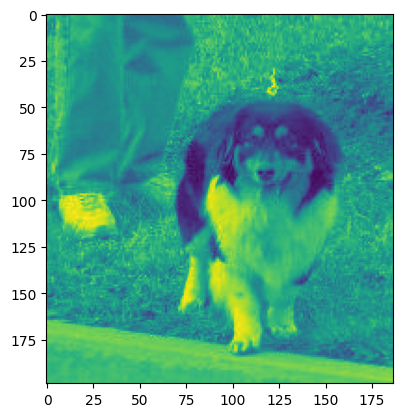

In [2]:
image=Image.open('train1/Dog/dog.2.jpg')
image=image.convert('L')
image=np.array(image)
plt.imshow(image)

In [4]:
len(os.listdir('train1/Cat')), len(os.listdir('train1/Dog'))

(1201, 1201)

In [2]:
categories = ['Cat', 'Dog']

In [3]:
def load_and_preprocess_data(categories):
    data = []

    for category in categories:
        path = os.path.join('train1', category)
        label = categories.index(category)
        for image in os.listdir(path):
            img_path = os.path.join(path, image)
            pet_img = cv2.imread(img_path)
            try:
                pet_img = cv2.resize(pet_img, (128, 64))
                pet_img = pet_img / 255.0  # Normalize pixel values
                data.append([pet_img, label])
            except Exception as e:
                pass

    random.shuffle(data)

    images = []
    labels = []

    for image, label in data:
        images.append(image)
        labels.append(label)

    return np.array(images), np.array(labels)

In [4]:
features, labels = load_and_preprocess_data(categories)

In [5]:
features.shape, labels.shape

((2402, 64, 128, 3), (2402,))

In [6]:
features[0:10], labels[0:10]

(array([[[[0.03921569, 0.01960784, 0.77647059],
          [0.03921569, 0.01960784, 0.77647059],
          [0.03921569, 0.01960784, 0.77647059],
          ...,
          [0.03529412, 0.01568627, 0.77254902],
          [0.03529412, 0.01568627, 0.77254902],
          [0.03137255, 0.01176471, 0.75686275]],
 
         [[0.03921569, 0.01960784, 0.77647059],
          [0.03921569, 0.01960784, 0.77647059],
          [0.03921569, 0.01960784, 0.77647059],
          ...,
          [0.03529412, 0.01568627, 0.77254902],
          [0.03529412, 0.01568627, 0.77254902],
          [0.03921569, 0.01960784, 0.76470588]],
 
         [[0.03921569, 0.01960784, 0.77647059],
          [0.03921569, 0.01960784, 0.77647059],
          [0.04313725, 0.02352941, 0.78039216],
          ...,
          [0.03529412, 0.01568627, 0.77254902],
          [0.03529412, 0.01568627, 0.77254902],
          [0.03529412, 0.01568627, 0.76078431]],
 
         ...,
 
         [[0.03529412, 0.02745098, 0.79215686],
          [0.03529

In [7]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

In [71]:
# Train the SVM model
model = SVC(C=0.1, gamma=0.1, kernel='rbf')
model.fit(x_train, y_train)

In [38]:
# Make predictions and evaluate accuracy
predictions = model.predict(x_test)
accuracy = model.score(x_test, y_test)

In [41]:
predicted_labels = (predictions > 0.5).astype(int)

In [39]:
print("Accuracy:", accuracy)

Accuracy: 0.47254575707154745


In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
conf_matrix = confusion_matrix(y_test, predicted_labels)

In [46]:
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[  0 317]
 [  0 284]]


In [56]:
filename = "SVC_model.sav"
pickle.dump(model, open(filename, 'wb'))

In [ ]:
""" Test the model in the test zip file """

# zip_file_path = 'test1.zip'
# extraction_path = 'test1'

# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extraction_path)


' Test the model in the test zip file '